## **Лабороторная работа 1 "Иерархический кластерный анализ"**

####**Экономика городов**

Данные описывают экономические условия в 48 городах мира в 1991 году.
Данные были собраны отделом экономических исследований банка Union (Швейцария).

Описаны экономические условия в 48 городах мира в 1991 году.

**Число наблюдений**: 48

**Переменные:**
| Название переменных | Описание |
|------------------|-----------|
| **City (Город)** | Название города |
| **Работа (Work)** | Взвешенное среднее числа рабочих часов, сосчитанное по 12 профессиям |
| **Цена (Price)** | Индекс цен 112 товаров и услуг, включая арендную плату за жилье (значение для Цюриха взято за 100%) |
| **Заработная плата (Salary)** | Индекс заработной платы за час работы, сосчитанный по 12 профессиям после налогов и вычетов (значение для Цюриха взято за 100%) |

#### **Подготовка данных**

In [ ]:
#Загружаем данные
!gdown 1CgelswAHDrIJA-evy5wF4zjIdBFNuq75

Downloading...
From: https://drive.google.com/uc?id=1CgelswAHDrIJA-evy5wF4zjIdBFNuq75
To: /content/Econom_Cities_data.csv
100% 1.18k/1.18k [00:00<00:00, 4.15MB/s]


In [ ]:
# Импортируем необходимые для работы библиотеки
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
# Импортируем данные
df = pd.read_csv('Econom_Cities_data.csv', sep=';', decimal=',', index_col='City')
df.head(10)

,Work,Price,Salary
City,,,
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5
Buenos_Aires,1971,56.1,12.5
Cairo,-9999,37.1,-9999.0
Caracas,2041,61.0,10.9
Chicago,1924,73.9,61.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, Amsterdam to Zurich
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Work    48 non-null     int64  
 1   Price   48 non-null     float64
 2   Salary  48 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.5+ KB


In [ ]:
# Смотрим описательную статистику
df.describe()

,Work,Price,Salary
count,48.000000,48.000000,48.000000
mean,1384.958333,68.860417,-378.727083
std,2404.897007,21.784659,2027.338052
min,-9999.000000,30.300000,-9999.000000
25%,1740.750000,49.650000,12.250000
50%,1834.500000,70.500000,40.300000
75%,1972.750000,81.700000,58.700000
max,2375.000000,115.500000,100.000000


Замечаем, что значения min по столбцам 'Work' и 'Salary' составляют -9999, что не может быть правдой. Скорее всего, так обозначили пропущенные данные (NaN). Уберем эти значения из выборки.

In [ ]:
df = df.replace(-9999, np.nan).dropna(subset=['Work', 'Salary'])
df.describe()

,Work,Price,Salary
count,46.000000,46.000000,46.000000
mean,1879.913043,70.100000,39.545652
std,174.342552,21.389177,24.757703
min,1583.000000,30.300000,2.700000
25%,1745.250000,51.775000,14.375000
50%,1849.000000,70.950000,43.650000
75%,1976.250000,81.900000,59.700000
max,2375.000000,115.500000,100.000000


Следующим шагом необходимо стандартизировать данные, так как они имеют разные диапазоны значений и измеряются в разных величинах. Воспользуемся формулой StandardScaler (приведение к нулевому среднему и единичной дисперсии)

**Формула**
$$
\mathrm{StandardScaler} \;=\; \frac{\mathrm{x} - \mathrm{mean}}{\mathrm{std}}
$$

In [ ]:
# Стандартизируем
X = df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### **Иерархический кластерный анализ**

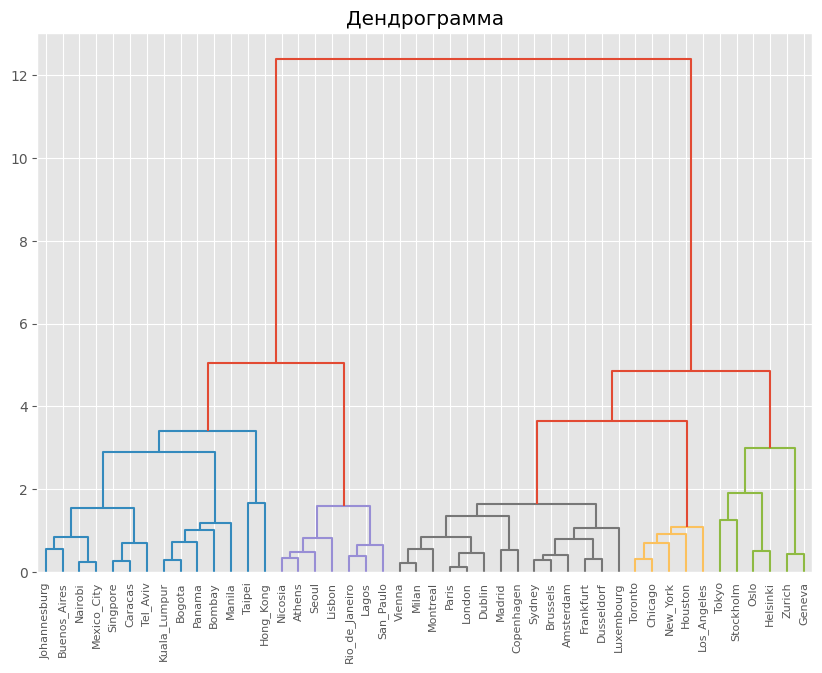

In [ ]:
# Строим дендограмму (метод Ward, Евклидово расстояние)
link = linkage(X_scaled, 'ward', 'euclidean')
fig = plt.figure(figsize=(10,7))
plt.title('Дендрограмма')

dn = dendrogram(link, orientation='top', distance_sort='descending', show_leaf_counts=True, color_threshold = 3.5, labels=X.index.tolist())

На основе полученной дендрограммы можно выделить, с одной стороны, 2 кластера, с другой - 5 кластеров. Выделение 2 кластеров представляет собой упрощенное разделение городов, поэтому для более точного разделения городов по экономическим условиям, **было принято решение выделить 5 кластеров.**

In [ ]:
#  Добавляем столбец cluster к таблице данных
df['cluster'] = fcluster(link, 5, criterion='maxclust')

In [ ]:
#  Средние значения баллов в каждом кластере
df.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
1,1780.500000,108.550000,71.300000
2,1960.000000,75.820000,59.480000
3,1732.000000,78.135714,53.614286
4,1798.857143,50.942857,19.214286
5,2082.357143,53.121429,14.914286


In [ ]:
df[df['cluster'] == 1].index.values

array(['Geneva', 'Helsinki', 'Oslo', 'Stockholm', 'Tokyo', 'Zurich'],
      dtype=object)

In [ ]:
df[df['cluster'] == 2].index.values

array(['Chicago', 'Houston', 'Los_Angeles', 'New_York', 'Toronto'],
      dtype=object)

In [ ]:
df[df['cluster'] == 3].index.values

array(['Amsterdam', 'Brussels', 'Copenhagen', 'Dublin', 'Dusseldorf',
       'Frankfurt', 'London', 'Luxembourg', 'Madrid', 'Milan', 'Montreal',
       'Paris', 'Sydney', 'Vienna'], dtype=object)

In [ ]:
df[df['cluster'] == 4].index.values

array(['Athens', 'Lagos', 'Lisbon', 'Nicosia', 'Rio_de_Janeiro',
       'San_Paulo', 'Seoul'], dtype=object)

In [ ]:
df[df['cluster'] == 5].index.values

array(['Bogota', 'Bombay', 'Buenos_Aires', 'Caracas', 'Hong_Kong',
       'Johannesburg', 'Kuala_Lumpur', 'Manila', 'Mexico_City', 'Nairobi',
       'Panama', 'Singpore', 'Taipei', 'Tel_Aviv'], dtype=object)

#### **Выводы**
На основе проведенного кластерного иерархического анализа было выделено 5 кластеров.

**1 кластер** - города с высоким уровнем жизни, наблюдается максимальные значения индекса цен и индекса заработной платы, при этом сохраняя умеренную продолжительность рабочего дня.

**2 кластер** - группа городов, где наблюдается приемлемый уровень цен при заработной плате выше среднего уровня, однако с повышенным значением продолжительности рабочего дня.

**3 кластер** - города, где наблюдается наиболее сбалансированная экономическая модель, все показатели находятся на "среднем" уровне.

**4 кластер** - группа городов с ограниченными экономическими возможностями, наблюдается сравнительно невысокий уровень цен и заработных плат, при этом длина рабочего дня умеренная.

**5 кластер** - города с низким уровне жизни, наблюдается низкий уровень заработных плат (при относительно высоком уровне цен) и одновременно максимальная продолжительность рабочего времени.